<a href="https://colab.research.google.com/github/visiont3lab/flask-static-website/blob/master/save_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/visiont3lab/flask-static-website/blob/master/save-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salvataggio



## Salvataggio notebook


In [1]:
%%capture
# Requisiti per convertire il notebook in pdf
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

1. Scaricare il notebook che si desidera convertire in pdf, html. **File - Download .ipynb**
2. Caricare il file scaricato. **File - Upload notebook** . Selezionare il file precedentement scaricato.

3. Se si desidera salvare i file convertiti direttamente nel proprio google drive è necessario
  * Montare google drive
    ```python
    from google.colab import drive
    drive.mount('/content/gdrive')
    ```
  * Accedere alla cartella di lavoro
  ```bash
  %cd cartella-di-lavoro
  ```
  > Questo step non è necessarrio se non si desidera salvare i files nel  proprio google drive.

4. Assumendo che il nome dell'ipython notebook caricato è **esempio.ipynb** eseguire i seguenti comandi

  ```bash
  # conversione in pdf
  !jupyter nbconvert --to html esempio.ipynb --output index.pdf

  # conversione in html
  !jupyter nbconvert --to html esempio.ipynb --output index.html
  ```

  I nuovi file saranno visibile nel **file-browser**, è necessario scaricarli cliccando con il tasto destro del mouse su di essi e selezionando l'opzione download.

## Montare google drive

## Scartare i warning


In [2]:
import  warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('once')  # see warning only one time

## Salvataggi utili

In [4]:
import pandas as pd
from google.colab import data_table
#%load_ext google.colab.data_table

# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df = df[df["denominazione_provincia"]=="Bologna"]
df["data"] = pd.to_datetime(df["data"]).dt.date
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
24,2020-02-24,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
152,2020-02-25,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
280,2020-02-26,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
408,2020-02-27,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
536,2020-02-28,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17581,2020-07-08,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,5321,NaN
17730,2020-07-09,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,5335,NaN
17879,2020-07-10,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,5358,NaN
18028,2020-07-11,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,5378,NaN


In [5]:
%%html
<!DOCTYPE html><head> <meta charset="utf-8"/>
<script src="https://code.jquery.com/jquery-3.4.1.slim.min.js" integrity="sha256-pasqAKBDmFT4eHoN2ndd6lN370kFiGUFyTiUHWhU7k8=" crossorigin="anonymous"></script>
<link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.20/css/jquery.dataTables.css">
<script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.20/js/jquery.dataTables.js"></script>

In [6]:
class Foo:
    def _repr_html_(self):
        dfhtml = df.to_html()
        start = '''<!DOCTYPE html><head> <meta charset="utf-8"/>'''
        stop =  '''<script src="https://code.jquery.com/jquery-3.4.1.slim.min.js"
                  integrity="sha256-pasqAKBDmFT4eHoN2ndd6lN370kFiGUFyTiUHWhU7k8="
                  crossorigin="anonymous">
                </script>
                <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.20/css/jquery.dataTables.css">
                <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.20/js/jquery.dataTables.js"></script>
                <script>
                  $(document).ready( function () {
                      $('.dataframe').DataTable();
                  } );
                </script>'''
        return start + dfhtml +stop 
         
o = Foo()
display(o)

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
24,2020-02-24,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
152,2020-02-25,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
280,2020-02-26,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
408,2020-02-27,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
536,2020-02-28,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,0,NaN
664,2020-02-29,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,2,NaN
792,2020-03-01,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,2,NaN
920,2020-03-02,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,3,NaN
1048,2020-03-03,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,6,NaN
1176,2020-03-04,ITA,8,Emilia-Romagna,37,Bologna,BO,44.494367,11.341721,11,NaN


## Salvataggio Datafame

In [ ]:
# Salvataggio Dataframe in un file excel
df.to_excel("dataframe.xlsx", sheet_name="Test",index=False)

In [ ]:
# Salvataggio Dataframe in un file csv
df.to_csv("dataframe.csv",index=False)

In [ ]:
# Salvataggio Dataframe in un file html
df.to_html("dataframe.html",index=None)

## Salvataggio figure

### Pandas - Matplotlib

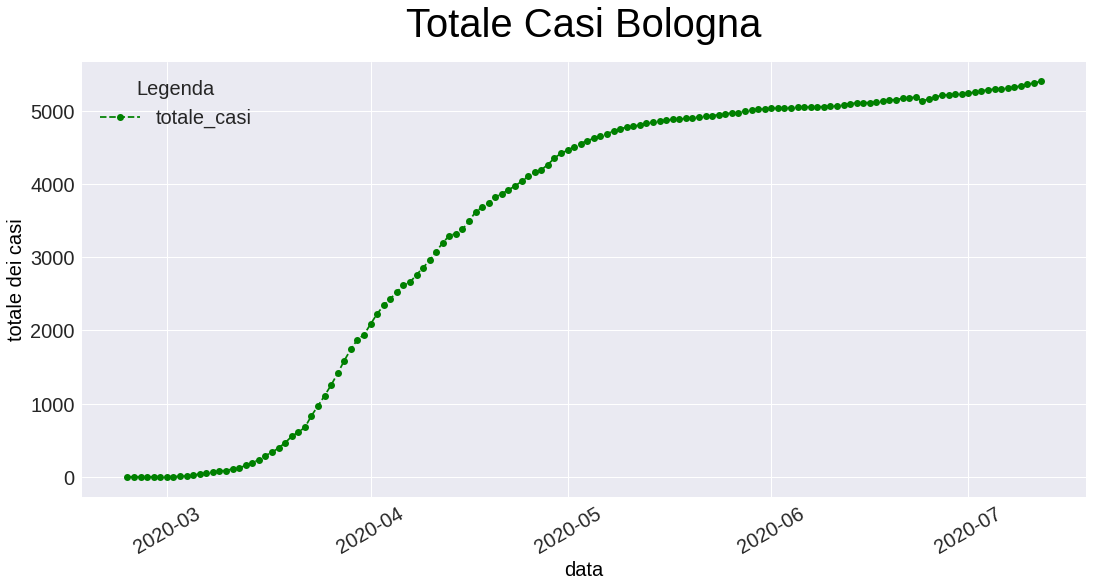

In [7]:
from matplotlib import pyplot as plt
import pandas as pd

# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df = df[df["denominazione_provincia"]=="Bologna"]
df["data"] = pd.to_datetime(df["data"]).dt.date

plt.style.use('seaborn') # fivethirtyeight

# Salvare una figura realizzata in pandas-matplotlib
def figure_pandas_matplotlib():
  # Parametri customizzazzione visualizzazione usando pandas
  fig, ax = plt.subplots(1, 1, figsize=(18,8))
  df.set_index("data").plot(y="totale_casi",kind="line",    
                                      title="My tile",
                                      ax=ax,
                                      figsize=(18,8),
                                      grid=True, 
                                      legend=True,fontsize=20, rot=30,
                                      style="o--g") # '-', '--', '-.', ':'] fmt = '[marker][line][color]'

  ax.set_title('Totale Casi Bologna', color="black", fontsize='40',pad=25)
  ax.set_xlabel('data', color='black',fontsize='20')
  ax.set_ylabel('totale dei casi', color='black',fontsize='20')
  ax.legend(loc='best',fontsize=20, title="Legenda", title_fontsize=20)
  return fig

# Save figure
fig = figure_pandas_matplotlib()
fig.savefig("pandas_matplotlib.png")

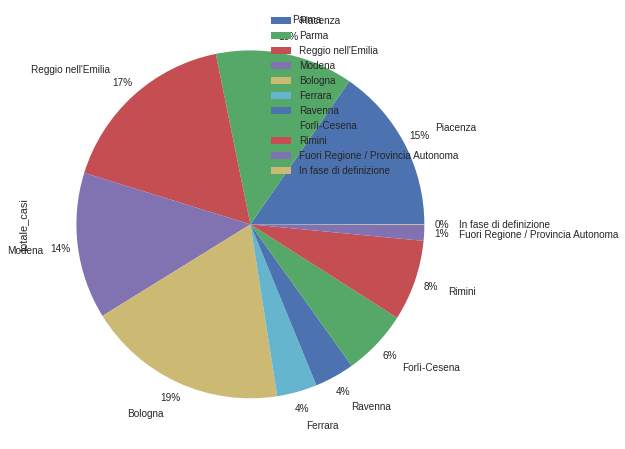

In [ ]:
import pandas as pd
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

regione="Emilia-Romagna"
provincia="Bologna"
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
ultima_data_aggiornamento = list(df.tail(1)["data"])[0]
df_choice = df[(df["denominazione_regione"]==regione) & (df["denominazione_provincia"]!='In fase di definizione/aggiornamento') & (df["data"]==ultima_data_aggiornamento) ]
#display(df_choice)
cont = {
    'totale_casi': list(df_choice["totale_casi"])
    }
df_plot = pd.DataFrame(cont, index=list(df_choice["denominazione_provincia"]) )

fig, ax = plt.subplots(1, 1, figsize=(18,8))
df_plot.plot(kind="pie", y="totale_casi",ax=ax,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
fig.savefig("pandas_matplotlib_pie.png")    

### Matplotlib 

#### Standard customization

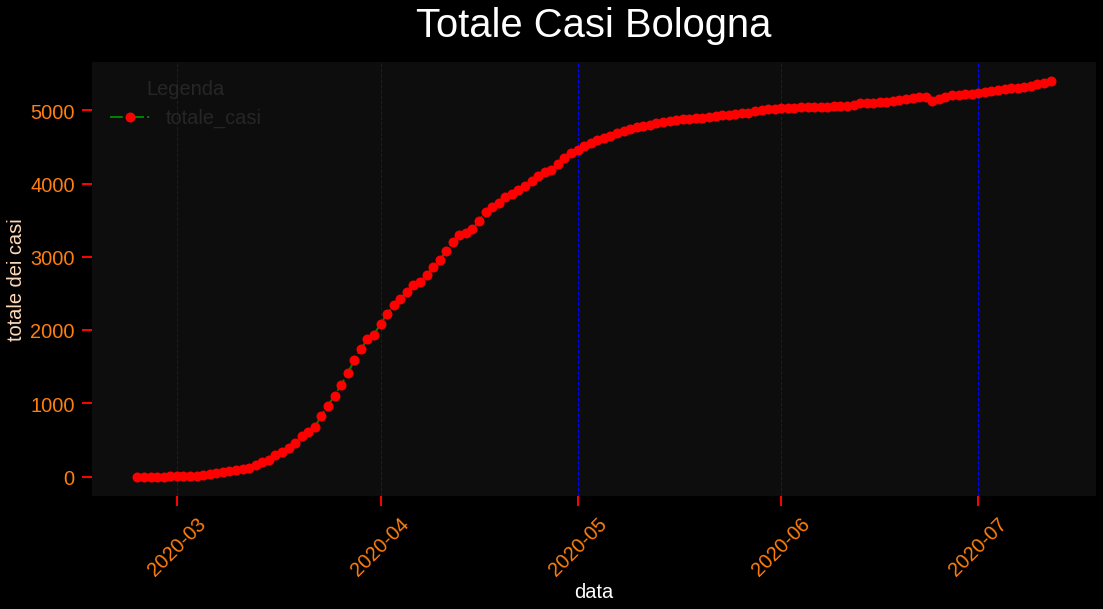

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df = df[df["denominazione_provincia"]=="Bologna"]
df["data"] = pd.to_datetime(df["data"]).dt.date

# https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html
# https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# https://www.tutorialspoint.com/matplotlib/index.htm
# plt.style("fiverthirtyeight")

x = df["data"].values.tolist()
y = df["totale_casi"].values.tolist()

fig, ax = plt.subplots(figsize=(18,8),facecolor=(0, 0, 0))

ax.set_facecolor((0.05,0.05,0.05)) #or use hex values
ax.set_title('Totale Casi Bologna', color=(1,1,1), fontsize='40',pad=25)
ax.set_xlabel('data', color='w',fontsize='20')
ax.set_ylabel('totale dei casi', color='peachpuff',fontsize='20')
ax.tick_params(axis='x' ,direction='out', length=10, width=2, colors='r' ,labelcolor='tab:orange',labelsize=20,labelrotation=45)
ax.tick_params(axis='y' ,direction='out', length=10, width=2, colors='r',labelcolor='tab:orange',labelsize=20)
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='b', linestyle='--')
plt.plot(x,y, marker='o', markerfacecolor='r', markersize=10, linestyle='-.', linewidth=2,color='green', label="totale_casi")
ax.legend(loc='best',fontsize=20, title="Legenda", title_fontsize=20)
plt.show()

fig.savefig("matplotlib.png")

#### Customizazzione usando rcParams

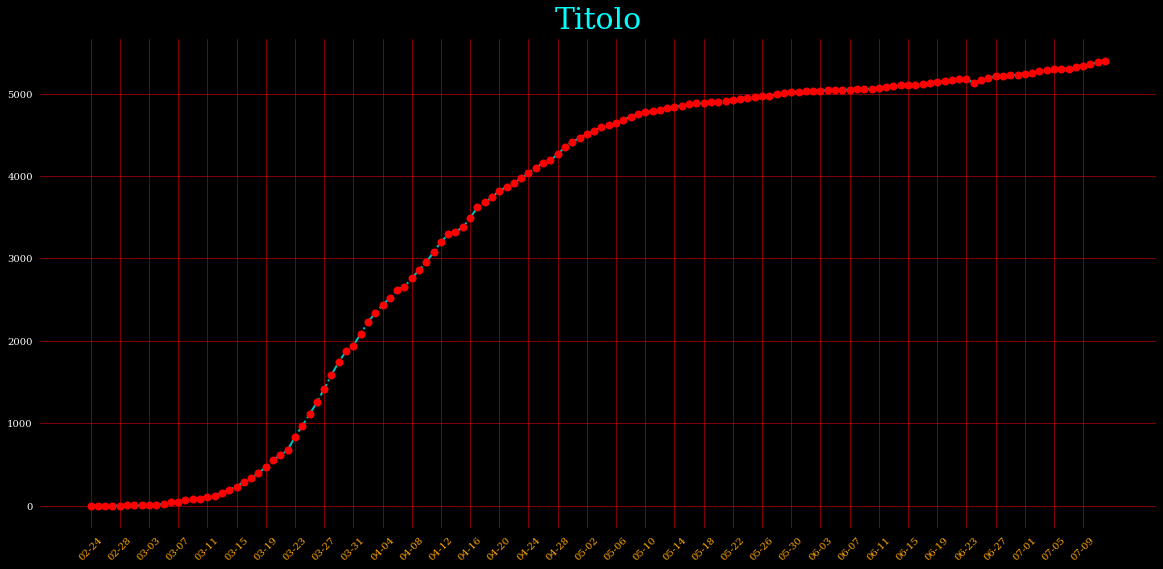

In [9]:
from cycler import cycler
import matplotlib.pyplot as plt
import pandas as  pd

# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df = df[df["denominazione_provincia"]=="Bologna"]
df["data"] = pd.to_datetime(df["data"]).dt.date

with plt.style.context('dark_background'):
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.linestyle'] = '-.'
    plt.rc('lines', marker='o', markerfacecolor='r', markersize=8, markeredgecolor="r")
    #plt.rc('lines', linewidth=2, color='red',linestyle='-.')
    plt.rcParams['axes.prop_cycle'] = cycler(color=['c', 'g', 'b', 'y']) # color line
    plt.rcParams['figure.figsize'] = (20,9)
    plt.rc("axes",titlesize=30, titlecolor="cyan",titlepad=10)
    plt.rcParams.update({"axes.grid" : True, "grid.color": "red", "grid.alpha" : 0.5})
    plt.rc("font", family="DejaVu Serif", fantasy="Comic Neue", size=20)
    plt.rcParams["date.autoformatter.day"]= "%m-%d" #"%Y-%m"
    # Sample half element of a series
    xlist = []
    data_list = list(df['data'])
    for i in range(0, len(data_list),4):
        xlist.append(data_list[i])
    fig, ax = plt.subplots()
    plt.plot(df["data"], df["totale_casi"])
    ax.set_title("Titolo")
    ax.set_xticks( xlist)
    ax.tick_params(axis='x',labelrotation=45,labelcolor='orange')
    #ax.yaxis.grid(False)

    plt.savefig("matplotlib_rcparams.png")
    #fig.savefig("matplotlib_rcparams.png")
    

### Plotly

In [10]:
%%capture
# Requisiti
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [11]:
from plotly.offline import init_notebook_mode, iplot
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
    <script src="/static/components/requirejs/require.js"></script>
    <script>
      requirejs.config({
        paths: {
          base: '/static/base',
          plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
        },
      });
  </script>
  '''))

In [12]:
import plotly
import plotly.graph_objects as go
import pandas as pd

#configure_plotly_browser_state()
#init_notebook_mode(connected=False)

# Plotly doc
# Plotly offline figure show
# https://plotly.com/python/reference/

# Leggiamo i dati
df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv")
df = df[df["denominazione_provincia"]=="Bologna"]
df["data"] = pd.to_datetime(df["data"]).dt.date

xx = df["data"].values.tolist()
yy = df["totale_casi"].values.tolist()

fig = go.Figure()

fig.add_trace(go.Scatter(
        x = xx,
        y = yy,
        name="Totale Casi",
        mode="lines+markers",
        showlegend=True,
        marker=dict(
            symbol="circle-dot",
            size=6,
        ),
        line=dict(
            width=1,
            color="rgb(0,255,0)",
            dash="longdashdot"
        )
    )
)
fig.update_layout(
    title=dict(
        text ="Totale Casi Bologna",
        y = 0.9,
        x = 0.5,
        xanchor = "center",
        yanchor = "top",
    ),
    legend=dict(
        y = 0.9,
        x = 0.03,
    ),
    xaxis_title="data",
    yaxis_title="totale casi",
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="orange", #"#7f7f7f", 
    ),
    hovermode='x',  #['x', 'y', 'closest', False]
    plot_bgcolor = "rgb(10,10,10)",
    paper_bgcolor="rgb(0,0,0)"
)


# Convert image to byte
#img_bytes = fig.to_image(format="png")

# Save figure https://plotly.com/python/static-image-export/
#fig.write_image("plotly.svg")
#fig.write_image("plotly.png")
#plotly.offline.plot(fig, filename = 'plotly.html', auto_open=False)
#fig.show(render="colab")
#fig.show(render="notebook") # ok with jupyter convert (does not work with colab)
iplot(fig)

## Convertire il notebbok in html

In [9]:
!jupyter nbconvert --no-input --to html text.ipynb 

[NbConvertApp] Converting notebook text.ipynb to html
[NbConvertApp] Writing 5506351 bytes to text.html
